In [1]:
# The perceptron 
# P370 - P372
# scikit-learn provides this

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int64)

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0], dtype=int64)

In [2]:
# Scikit-Learn's Perceptron class is equivalent to using an SGDClassifer
# with loss="perceptron", learning_rate="constant", eta0=1, penalty=None
# Logistic Regression is prefered most of the time over Perceptrons

# About how multilayer solver XOR problem → P373

In [3]:
#Activation function to make gradient decsent work
# 1.sigmoid function
# 2.hyperbolic tangent
# 3.Rectified Linear Unit Function (ReLU, which is the default because of it
#   feature of high speed)
# P 377


# typical architecture of regression MLP
# P 379

In [4]:
# typical architecture of classification  MLP
# P 381

In [5]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.12.0'

In [6]:
keras.__version__

'2.12.0'

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
# /255.0 to scale the input features for Gradient Descent
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

(-0.5, 27.5, 27.5, -0.5)

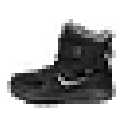

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(255-X_train_full[0], cmap="gray")
plt.axis("off")

In [13]:
# build a classification MLP with two layers
model = keras.models.Sequential()
# create a Sequential model
model.add(keras.layers.Flatten(input_shape=[28,28]))
# build the first layer,Flatten layer convert each input image into a 1D array by reshape
# Alternatively, keras.layers.InputLayer with input_shape="([28, 28])" does the same
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [14]:
# another method
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


In [15]:
model.summary()
# None means the batch size can be anything

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [18]:
model.get_layer("dense_3") is hidden1

True

In [19]:
weights, biases = hidden1.get_weights()
weights
# use get_weights to check weights at anytime
# connection weights are initialized randomly

array([[-0.06424113, -0.00209828,  0.03729387, ...,  0.07432742,
        -0.01133536,  0.0461175 ],
       [ 0.06305823,  0.05679734, -0.05879511, ...,  0.05103269,
         0.03278699,  0.03392045],
       [ 0.00370225,  0.06092356, -0.03398788, ..., -0.03803067,
         0.01579133,  0.03626957],
       ...,
       [ 0.06971672, -0.00461956, -0.02462642, ...,  0.04352748,
         0.06920369, -0.04180899],
       [-0.01172329, -0.03561502, -0.0575038 , ..., -0.00077257,
         0.04213373,  0.06333381],
       [-0.01978917,  0.04566119, -0.06556103, ...,  0.00602242,
         0.07213627,  0.03296071]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases[:20
      ]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [22]:
biases.shape

(300,)

In [23]:
# use compile() to specify the loss function and the optimizer
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# the labels are sparse labels (0,1,2,3,4...)
# Thus, sparse_ should be used
# instead, if we had one target probability per class for each instance
# for exmplae[0, 0, 0, ...1, 0 ,0], cateforical_crossentropy should be used

# if binary classification,
# use "sigmoid"  instead of "softmax" in the output layer, and "binary_crossentropy"
# as the loss funciont
# P 392

In [24]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
# epochs are by default 1, which is definitely not enough

# if validation_data=() are set,
# Keras will measure the loss and the extra metrics
# on this set at the end of each epoch, which is very useful to see how well the
 # model really performs

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7152 - accuracy: 0.7647 - val_loss: 0.5411 - val_accuracy: 0.8138
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4873 - accuracy: 0.8307 - val_loss: 0.4650 - val_accuracy: 0.8440
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4436 - accuracy: 0.8451 - val_loss: 0.4488 - val_accuracy: 0.8368
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4149 - accuracy: 0.8538 - val_loss: 0.3953 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3945 - accuracy: 0.8613 - val_loss: 0.3781 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3798 - accuracy: 0.8664 - val_loss: 0.3709 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3672 - accuracy: 0.8701 - val_loss: 0.3751 - val_accuracy:

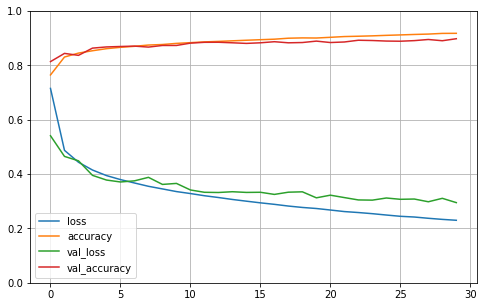

In [25]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)# set the vertical range to [0-1]
plt.show()

# .history gives the dictionary containing the loss and extra metrics it measured
# at the end of each epoch on the training set and on the validation set
# plot it forms the learning curves

In [26]:
# change the learning rate and retrain
model.optimizer = keras.optimizers.SGD(learning_rate=0.05)


In [27]:
history_1 =model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2266 - accuracy: 0.9189 - val_loss: 0.3114 - val_accuracy: 0.8902
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2229 - accuracy: 0.9207 - val_loss: 0.3000 - val_accuracy: 0.8928
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2189 - accuracy: 0.9212 - val_loss: 0.3008 - val_accuracy: 0.8924
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2159 - accuracy: 0.9232 - val_loss: 0.3012 - val_accuracy: 0.8950
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2121 - accuracy: 0.9231 - val_loss: 0.3065 - val_accuracy: 0.8872
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2085 - accuracy: 0.9257 - val_loss: 0.3043 - val_accuracy: 0.8910
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2056 - accuracy: 0.9256 - val_loss: 0.3139 - val_accuracy:

In [28]:
a = history.history.copy()
b = history_1.history.copy()

combined_dict = {}
for key in a.keys():
    combined_dict[key] = a[key] + b[key]

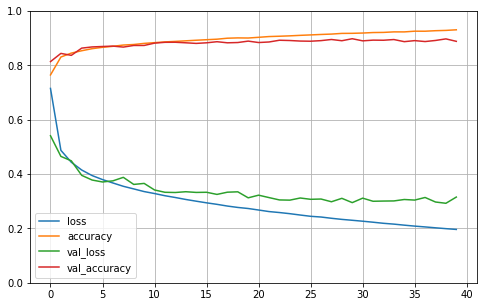

In [29]:
import pandas as pd
pd.DataFrame(combined_dict).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)# set the vertical range to [0-1]
plt.show()

In [30]:
# dict結合のサンプルコード

a = {'loss': [0.2, 0.15, 0.1], 'accuracy': [0.9, 0.95, 0.98]}
b = {'loss': [0.08, 0.06, 0.04], 'accuracy': [0.99, 0.98, 0.97]}

combined_dict = {}
for key in a.keys():
    combined_dict[key] = a[key] + b[key]

print(combined_dict)

{'loss': [0.2, 0.15, 0.1, 0.08, 0.06, 0.04], 'accuracy': [0.9, 0.95, 0.98, 0.99, 0.98, 0.97]}


In [31]:
# test the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 78.3913 - accuracy: 0.8335


[78.39125061035156, 0.8335000276565552]

In [32]:
# use predict() to make predictions on new instances with the model
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba
# .roundは小数点以下2位に丸めること

1/1 [==============================] - 0s 72ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

1/1 [==============================] - 0s 18ms/step


array([9, 2, 1], dtype=int64)

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
# Building a Regression MLP with Sequential API
# with california housing prize data

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
pd.DataFrame(y_train)[:8] #yは規格化済

,0
0,1.442
1,1.687
2,1.621
3,2.621
4,0.956
5,1.726
6,1.873
7,1.337


In [37]:
np.random.seed(42)
tf.random.set_seed(42)

In [38]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
# use just one input layer (Thus, choose Dense and relu directly for the input layer)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8837 - val_loss: 1.4412
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7458 - val_loss: 0.7020
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6835 - val_loss: 0.6423
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6531 - val_loss: 0.6157
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6280 - val_loss: 0.5981
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6038 - val_loss: 0.5757
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5825 - val_loss: 0.5786
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5626 - val_loss: 0.5399
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5436 - val_loss: 0.5261
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5264 - val_loss: 0.5202

In [39]:
a = history.history

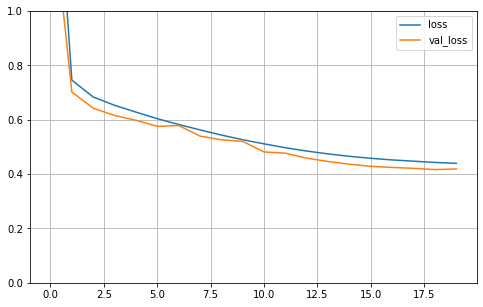

In [40]:

pd.DataFrame(a).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)# set the vertical range to [0-1]
plt.show()

In [41]:
X_train.shape[:1]

(11610,)

In [42]:
# one example of nonsequential neural network
# Wide & Deep

input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
# .Concatenate creates a layer's instance
# and then use([]) to combine
output=keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
# after this, compile it and train

In [43]:
# send a subset of the features through the wide path and a different subset trough the deep path
# P401- 402
input_a = keras.layers.Input( shape=[5], name="wide_input")
input_b = keras.layers.Input( shape=[6], name="deep_path")
hidden1 = keras.layers.Dense(30, activation="relu")(input_b)
hidden2 = keras.layers.Dense(30, activation ="relu")(hidden1)
concat = keras.layers.Concatenate()([input_a, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model( inputs=[input_a, input_b], outputs=[output])
# name the layers especially when the model gets complex

In [44]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_a, X_train_b = X_train[:, :5], X_train[:, 2:]
X_valid_a, X_valid_b = X_valid[:, :5], X_valid[:, 2:]
X_test_a, X_test_b = X_test[:, :5], X_test[:, 2:]
X_new_a, X_new_b = X_test_a[:3], X_test_b[:3]

history = model.fit((X_train_a, X_train_b), y_train, epochs=20, validation_data=((X_valid_a, X_valid_b),
                    y_valid))
mse_test = model.evaluate((X_test_a, X_test_b), y_test)
y_pred = model.predict((X_new_a, X_new_b))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8389 - val_loss: 1.9775
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5351 - val_loss: 5.7160
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5420 - val_loss: 1.5444
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4249 - val_loss: 4.1542
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4338 - val_loss: 5.7953
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4489 - val_loss: 0.3964
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4057 - val_loss: 0.3685
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3940 - val_loss: 0.3641
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3876 - val_loss: 0.3642
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3853 - val_loss: 0.3551

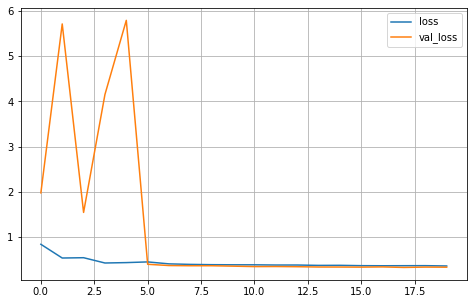

In [45]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [46]:
# when to use multiple input ( P 403)
# an example in P 404 to build multiple outputs

input_a = keras.layers.Input( shape=[5], name="wide_input")
input_b = keras.layers.Input( shape=[6], name="deep_path")
hidden1 = keras.layers.Dense(30, activation="relu")(input_b)
hidden2 = keras.layers.Dense(30, activation ="relu")(hidden1)
concat = keras.layers.Concatenate()([input_a, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1 , name="aux_output")(hidden2)
model = keras.Model( inputs=[input_a, input_b], outputs=[output, aux_output])

# when compiling, each output needs its own loss_function
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit([X_train_a, X_train_b], [y_train, y_train],
                     epochs=20, validation_data=([X_valid_a, X_valid_b],[y_valid, y_valid]
                    ))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0281 - main_output_loss: 0.8747 - aux_output_loss: 2.4090 - val_loss: 2.1518 - val_main_output_loss: 1.9984 - val_aux_output_loss: 3.5321
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5931 - main_output_loss: 0.5389 - aux_output_loss: 1.0803 - val_loss: 1.3648 - val_main_output_loss: 1.3935 - val_aux_output_loss: 1.1063
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5143 - main_output_loss: 0.4730 - aux_output_loss: 0.8860 - val_loss: 4.4589 - val_main_output_loss: 4.8439 - val_aux_output_loss: 0.9946
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4782 - main_output_loss: 0.4462 - aux_output_loss: 0.7660 - val_loss: 0.7777 - val_main_output_loss: 0.7827 - val_aux_output_loss: 0.7328
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4483 - main_output_loss: 0.4205 - aux_output_loss: 0.6990 - val_loss

In [47]:
# when multiple outputs, a total_loss gets returned
total_loss, main_loss, aux_loss = model.evaluate([X_test_a, X_test_b],[y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.3589 - main_output_loss: 0.3462 - aux_output_loss: 0.4734


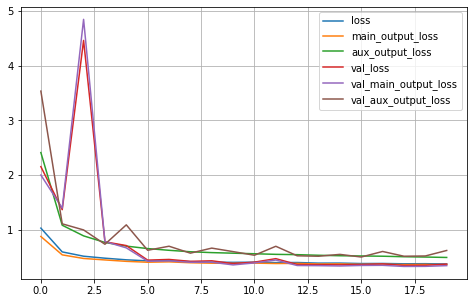

In [48]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [49]:
# Using the subclassing API to Build Dynamic Models
# GPT:Sequential APIとFunctional APIは静的なモデル構造を扱うために有用であり、
# モデルの保存や共有、デバッグなどが容易です。一方、Subclassing APIは動的なモデル
# 構造や条件分岐などを扱うために適しています。それぞれのAPIは異なる利点と制約があり、
# 使用する際にはモデルの要件や好みに応じて選択する必要があります。

# build a WideAndDeepModel using subclass techniques
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) #handles standard args
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_a, input_b = inputs
        hidden1 = self.hidden1(input_a)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.Concatenate()([input_a, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeepModel()

# we can tweak with the call function to research it 
# merit and demerit P406-407  

In [50]:
# to save and restore a model
# model = keras.layers.Sequential([...]) or keras.Model([...])
# model.compile([...])
# model.fit([...])
# model.save(" xxx.h5")
# HDF5 is a format that can save both the model's architecture and the values of all the model parameters

In [51]:
# to load a saved model
# model = keras.models.load_model("xxx.h5")
# this doesnt work when using subclassing
# for subclassing, use save_weights() and load_weights() to at least restore the model parameters

# when doing training on large datasets, save checkpoints while training

In [52]:
# use callbacks
#   [...] build and compile the model
#   checkpoint_cb = keras.callbacks.ModelCheckpoint(" xxx.h5", save_best_only=True)
#   history = model.fit(X_train, y_train, epochs=10, callbacks = [checkpoint_cb])

# save_best_only = True makes it save the model when its performance on 
# the validation set is the best so far ( when using valid in model.fit)
# this corresponds to an early stopping



In [53]:
# another way of earlystopping

# early_stopping_cb = keras.callbacks.EarlyStopping( patience=10, restore_best_weights=True)
# history = model.fit(X_yrain, y_train, epochs=100, validation_data=(X_valid, y_valid),
#                     callbacks=[checkpoint_cb, early_stopping_cb])
# no need of setting save_best_only because early stopping does it automatically

# for another callbacks  P409

In [57]:
# TensorBoard

input_a = keras.layers.Input( shape=[5], name="wide_input")
input_b = keras.layers.Input( shape=[6], name="deep_path")
hidden1 = keras.layers.Dense(30, activation="relu")(input_b)
hidden2 = keras.layers.Dense(30, activation ="relu")(hidden1)
concat = keras.layers.Concatenate()([input_a, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1 , name="aux_output")(hidden2)
model = keras.Model( inputs=[input_a, input_b], outputs=[output, aux_output])

# when compiling, each output needs its own loss_function
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")



import os
root_logdir=os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit([X_train_a, X_train_b], [y_train, y_train],
                     epochs=20, validation_data=([X_valid_a, X_valid_b],[y_valid, y_valid]),
                    callbacks=[tensorboard_cb])



Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9506 - main_output_loss: 0.8386 - aux_output_loss: 1.9593 - val_loss: 1.7487 - val_main_output_loss: 1.7923 - val_aux_output_loss: 1.3561
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5655 - main_output_loss: 0.5051 - aux_output_loss: 1.1090 - val_loss: 6.1997 - val_main_output_loss: 6.7594 - val_aux_output_loss: 1.1619
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5677 - main_output_loss: 0.5308 - aux_output_loss: 0.8995 - val_loss: 0.5501 - val_main_output_loss: 0.4959 - val_aux_output_loss: 1.0377
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - main_output_loss: 0.4250 - aux_output_loss: 0.7536 - val_loss: 1.4409 - val_main_output_loss: 1.5036 - val_aux_output_loss: 0.8766
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4497 - main_output_loss: 0.4258 - aux_output_loss: 0.6645 - val_loss

In [60]:
# an alternative way to use TensorBoard directly within Jupyter
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006


In [ ]:
# web interface
# P412
# run command in a terminal

# or directly go to 
# http://localhost:6006


# tool box of creating a SummaryWriter

In [63]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi *step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)


In [67]:
# fine tuning neural network hyperparameters
# 1. use GridSearchCV and RandomizedSearchCV
# ex.
def build_model(n_hidden=1, n_neurons=30, learning_rate = 3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model
# build a KerasRegressor based on this build_model() function:
# that can be used as a scikit-learn regressor
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs=100, validation_data=[X_valid, y_valid],
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100


C:\Users\blueb\AppData\Local\Temp\ipykernel_4560\2391647094.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


363/363 [==============================] - 1s 1ms/step - loss: 1.2152 - val_loss: 2.8250
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7043 - val_loss: 1.9719
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5818 - val_loss: 2.2119
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5300 - val_loss: 2.1220
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4861 - val_loss: 1.1691
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4628 - val_loss: 1.1990
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4463 - val_loss: 0.7809
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4309 - val_loss: 0.6603
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4213 - val_loss: 0.4504
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4123 - val_loss: 0.6580
E

In [68]:
# use a randomized search CV (because there are many hyperparameters) 
# P 416
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs ={"n_hidden": [0,1,2,3],
                 "n_neurons":[1, 100],
                 "learning_rate":reciprocal(3e-4, 3e-2),
                }
# RandomizedSearchCVは指定された範囲内でランダムに取るためreciprocalを使う
# reciprocal逆数分布は、値が小さくなるにつれて確率密度が大きくなるため、
# 範囲内の小さな値に重点を置いてサンプリングする効果があります
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs , n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=[X_valid, y_valid],
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.6580 - val_loss: 1.4084
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5620 - val_loss: 0.5167
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5552 - val_loss: 1.0802
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5420 - val_loss: 0.5206
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5479 - val_loss: 1.4219
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5250 - val_loss: 3.9057
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6062 - val_loss: 3.8639
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5377 - val_loss: 7.2180
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6770 - val_loss: 16.9750
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6730 - val_l

242/242 [==============================] - 0s 2ms/step - loss: 0.5530 - val_loss: 0.8086
Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5522 - val_loss: 0.7769
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5511 - val_loss: 0.7556
Epoch 44/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5497 - val_loss: 0.7916
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5489 - val_loss: 0.7963
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5481 - val_loss: 0.7771
Epoch 47/100
121/121 [==============================] - 0s 759us/step - loss: 0.5470
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 5.7331 - val_loss: 13.0483
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 3.5655 - val_loss: 9.4996
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 2.3666 - val_loss: 6.9046
Epoch 4/100


242/242 [==============================] - 0s 1ms/step - loss: 0.4071 - val_loss: 0.3938
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4054 - val_loss: 0.3796
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4035 - val_loss: 0.3907
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4020 - val_loss: 0.3768
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4003 - val_loss: 0.3922
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3988 - val_loss: 0.3738
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3972 - val_loss: 0.3890
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3959 - val_loss: 0.3734
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3944 - val_loss: 0.3716
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3931 - val_loss: 

Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4930 - val_loss: 0.6806
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4840 - val_loss: 0.7214
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4760 - val_loss: 0.7368
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4688 - val_loss: 0.7456
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4626 - val_loss: 0.7483
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4566 - val_loss: 0.7595
Epoch 20/100
121/121 [==============================] - 0s 921us/step - loss: 0.4695
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 2.5289 - val_loss: 1.3909
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8825 - val_loss: 0.7452
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7244 - val_loss: 0.6735


242/242 [==============================] - 0s 1ms/step - loss: 0.3787 - val_loss: 0.3542
Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3781 - val_loss: 0.3529
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3775 - val_loss: 0.3639
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3768 - val_loss: 0.3795
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3768 - val_loss: 0.3511
Epoch 78/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3759 - val_loss: 0.3524
Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3755 - val_loss: 0.3512
Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3749 - val_loss: 0.3603
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3746 - val_loss: 0.3499
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3741 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.6045 - val_loss: 3.7530
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8282 - val_loss: 0.7286
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6902 - val_loss: 0.6144
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5912 - val_loss: 0.5347
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5558 - val_loss: 0.9988
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6237 - val_loss: 0.6976
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6509 - val_loss: 0.5731
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5632 - val_loss: 0.5107
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5851 - val_loss: 0.5684
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5560 - val_loss: 0.

242/242 [==============================] - 0s 1ms/step - loss: 1.7742 - val_loss: 1.6541
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 1.6594 - val_loss: 1.5609
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 1.5745 - val_loss: 1.4928
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 1.5119 - val_loss: 1.4432
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 1.4658 - val_loss: 1.4069
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 1.4317 - val_loss: 1.3806
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 1.4065 - val_loss: 1.3615
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3880 - val_loss: 1.3477
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3743 - val_loss: 1.3378
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3642 - val_loss: 1

242/242 [==============================] - 0s 1ms/step - loss: 1.3908 - val_loss: 1.3387
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3768 - val_loss: 1.3303
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3664 - val_loss: 1.3245
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3588 - val_loss: 1.3206
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3531 - val_loss: 1.3180
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3490 - val_loss: 1.3164
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3459 - val_loss: 1.3154
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3436 - val_loss: 1.3149
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3420 - val_loss: 1.3147
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3407 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4380 - val_loss: 0.4136
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4385 - val_loss: 0.4038
Epoch 27/100
121/121 [==============================] - 0s 886us/step - loss: 0.4578
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3337 - val_loss: 0.6810
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6327 - val_loss: 0.5102
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5168 - val_loss: 0.4499
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4811 - val_loss: 0.4267
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4662 - val_loss: 0.4166
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4603 - val_loss: 0.4127
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4560 - val_loss: 0.4066
Epoch 8/100
242/2

242/242 [==============================] - 0s 1ms/step - loss: 0.6781 - val_loss: 3.0008
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6530 - val_loss: 2.0843
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6319 - val_loss: 1.4995
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6132 - val_loss: 1.0996
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5959 - val_loss: 0.8416
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5799 - val_loss: 0.6393
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5650 - val_loss: 0.5477
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5510 - val_loss: 0.5152
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5379 - val_loss: 0.5169
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5256 - val_loss: 0.

Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3636 - val_loss: 0.3572
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3628 - val_loss: 0.3565
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3620 - val_loss: 0.3552
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3611 - val_loss: 0.3584
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3605 - val_loss: 0.3534
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3598 - val_loss: 0.3557
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3589 - val_loss: 0.3541
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3582 - val_loss: 0.3535
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3575 - val_loss: 0.3508
Epoch 72/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3569

Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 738.1046 - val_loss: 138812.7969
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 1542.4352 - val_loss: 684246.4375
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 16691.0449 - val_loss: 3359677.5000
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 46855.5742 - val_loss: 16601899.0000
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 481269.3125 - val_loss: 86868960.0000
Epoch 11/100
121/121 [==============================] - 0s 880us/step - loss: 1124895.2500
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3953 - val_loss: 2.7467
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5822 - val_loss: 15.6049
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5299 - val_loss: 23.0139
Epoch 4/100
242/242 [=============================

363/363 [==============================] - 0s 1ms/step - loss: 0.3754 - val_loss: 0.3496
Epoch 51/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3746 - val_loss: 0.3642
Epoch 52/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3740 - val_loss: 0.3490
Epoch 53/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3729 - val_loss: 0.3915
Epoch 54/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3725 - val_loss: 0.3483
Epoch 55/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3716 - val_loss: 0.3546
Epoch 56/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3708 - val_loss: 0.3557
Epoch 57/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3701 - val_loss: 0.3480
Epoch 58/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3693 - val_loss: 0.3800
Epoch 59/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3688 - val_loss: 

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001702F834130>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001703277E6D0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 100]})

In [69]:
rnd_search_cv.best_params_

{'learning_rate': 0.0009530589314291174, 'n_hidden': 1, 'n_neurons': 100}

In [79]:
-rnd_search_cv.best_score_

0.40161436796188354

In [70]:
model = rnd_search_cv.best_estimator_.model

In [71]:
model.save(" housing.h5")

In [76]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 798us/step - loss: 0.3511


0.3510507643222809

In [ ]:
# python libraries to optimize hyperparameters
# P 417